In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import*

In [91]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
bs = 3

In [0]:
str_path = "/content/data/animal_data"
path = Path(str_path)

In [95]:
path.ls()

[PosixPath('/content/data/animal_data/valid'),
 PosixPath('/content/data/animal_data/models'),
 PosixPath('/content/data/animal_data/train'),
 PosixPath('/content/data/animal_data/.ipynb_checkpoints')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, bs=bs, ds_tfms=tfms, size=224)

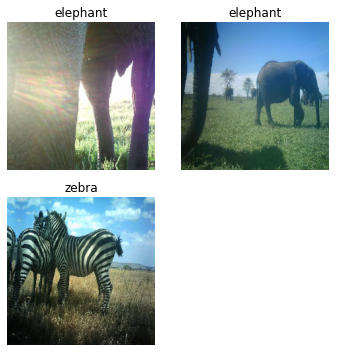

In [97]:
data.show_batch(rows=3, figsize=(5,5))

## Training: resnet34

In [99]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.559403,0.128725,0.944444,00:00
1,0.846684,0.128297,0.972222,00:00


In [0]:
learn.save('stage-1')

In [101]:
interp = ClassificationInterpretation.from_learner(learn)

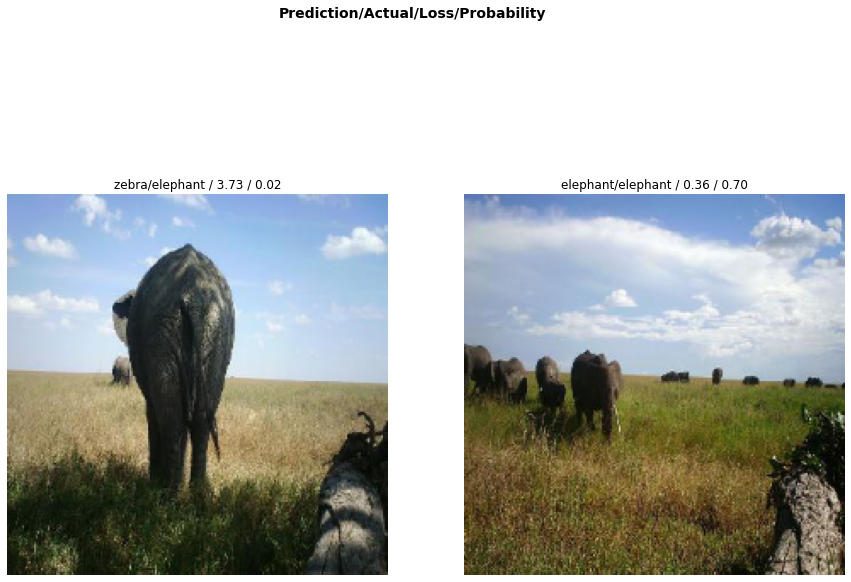

In [105]:
interp.plot_top_losses(2, figsize=(15,11))

In [106]:
interp.most_confused(min_val=2 )

[]

In [107]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


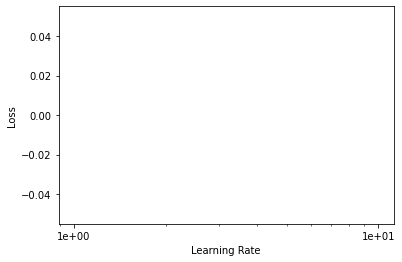

In [108]:
learn.recorder.plot()